## Name : Pat O'Dowd
## Number : 8273375

# CE5012 Assignment 3:

The assignment notebook should be named following the convention 'student_id_CE5012_Assignment3.ipynb'.

## Part-1:

This week’s assignment involves an in-depth exploration of two major research works in foundation models: Masked Auto Encoders (MAE) and OpenAI's CLIP.

MAE: https://arxiv.org/abs/2111.06377

OpenAI CLIP: https://openai.com/research/clip

During our lecture, we discussed four different methodologies employed to build large-scale vision foundation models:

*   Contrastive Learning → SimCLR
*   Knowledge Distillation → DINO
*   Token Masking → MAE
*   Vision-Language Fusion → CLIP

We covered only the first two models in our lectures. Now, as part of the assignment, you are required to understand the remaining two models, MAEs and CLIP, in detail and prepare notes on each topic. Your notes should be part of the notebook and should cover the following major points:

- A quick overview of the architecture.

- The training strategies used.

- Loss functions employed.

- Key differences between the MAEs and CLIP architectures (2 to 3 points).


This is a significant topic, and hence, some of the questions in the QUIZ will be on these foundation models.

## Evaluation Criteria:

1. 3 points: MAE Presentation
2. 3 points: CLIP Presentation
3. 4 points: Key differences between MAE and CLIP



## Your Part-1 Work Starts From Here



## MAE Presentation

Masked autoencoders (MAE) are scalable self-supervised learners for computer vision. 
### Architecture
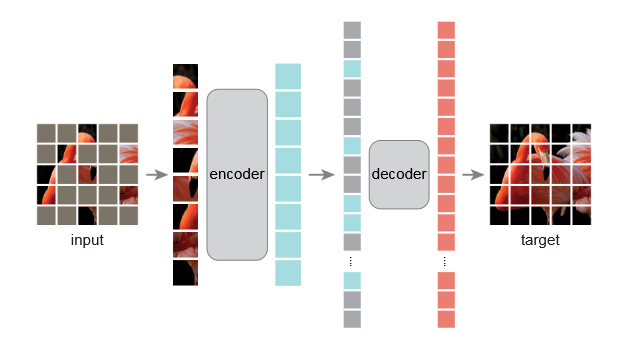

The MAE is an asymmetric encoder-decoder architecture. The encoder is a Visual Transformer (ViT) model that operates on a subset of the original image (only the visible image patchs). The decoder is a lightweight model both shallower and narrower than the encoder. The fact that the encoder operates on a subset of the image and the lightweight nature of the decoder ensure a more scalable solution. Self supervised learning is achieved through the use of a loss function that compares the reconstructed image from the decoder with the original image. Note the loss is computed only on the masked patchs. Once learning is completed the decoder aspect of the model can be discarded and the encoder model used for image recognition.

### Training aspects
The Training aspects of the MAE are as follows.
1. Generation of non-overlapping image patchs of the original image.
2. Sampling of a random selection of the image patchs and masking of the remaining patchs. The number of sampled image patchs
   could for example represent 25% of the total number of image patchs.
3. The sampled image patchs are fed into the encoder. 
4. The encoder encodes the visible patchs
5. The decoder takes as input the encoded visible patchs and the mask tokens. Note that positional embeddings are added to the the tokens for the visible     patchs and for the mask tokens. This ensures that the token positions in the original image are avaialble to the decoder.
6. The decoder reconstructs the image
7. The loss function is the Mean Squared Error (MSE between the reconstructed image and the original image in pixel space. Note loss is computed only on      the masked patchs

### MAE Strengths
1. The model trains on a subset of the image data and employs a lightweight decoder. Because of this the model provides a more scalable solution as less computing resources are required compared to some other models.
2. Model does not require data augmentation as in effect the role of data augmentation is mainly performed by the random masking. 3.
3. The accuracy of the model appears to improve steadily with longer training.



## ClIP Presentation

### Contrastive Language-Image Pre-training (CLIP)

### Architecture
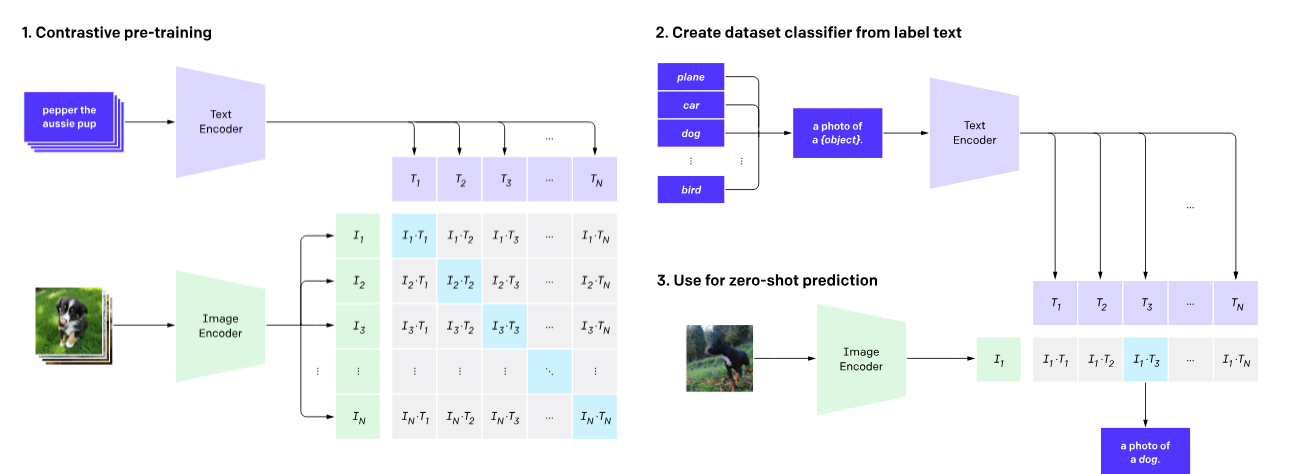

CLIP is a form of contrastive learning. The input to a CLIP model is a set of images and their corresponding set of captions. The model is trained by finding similiarity between the image and the caption. This is achieved using 2 separate encoders, one for the text (image caption) and the other for the image encoder. The text encoder is a transformer model and the image encoder is typically a Vision Transformer (ViT) eventhough a ResNet-50 can also be used. 

### Training Aspects
1. Text Encoder. This is a transformer model that produces a set of text embeddings.
2. Image Enoder. This is typicall a Vision Transformer model (ViT) that produces a set of image embeddings.
3. Training is done jointly on the image embeddings and the text embeddings. The objective is to maximise the cosine similiarity between positive pairs of image and text.
4. The loss fuunction is the cross entropy loss.
### CLIP Strengths
1. Does not require large manually labelled datasets
2. Does not need additional training examples for new tasks
### CLIP weaknesses
1. Struggles on abstract or systematic tasks such as counting number of objects in an image
2. Weak on fine grained classification such as telling differences within a class
3. Poor generalisation to images not covered in its pre-training dataset.
4. May require trial and error prompt engineering  to perform well.




## Key Differences between MAE and CLIP
1. Masked auto encoders take image input only as input. CLIP takes image and caption pairs as input.
2. MAE uses an asymetric encoder-decoder architecture. CLIP uses a dual-encorder architecture. 
3. Masked Autoencoders learn feature representations by comparing the original image with a generated version of the image. CLIP learns the image and text embeddings based on a similiarity of positive pairs of image and caption.
4. MAE uses the MSE loss function. CLIP uses the cross-entropy loss.



# Part-2

The aim is to utilize the pre-trained DINO and CLIP models for feature extraction on three specific classes: airplanes, bonsai trees, and butterflies. We will then visualize these features in a lower dimension using t-SNE (t-Distributed Stochastic Neighbor Embedding). The expected outcome is to observe three distinct clusters, each corresponding to a specific class, even though the models haven't been trained on this particular dataset.

## Explanation:

1. We will leverage pre-trained DINO and CLIP models to extract features from images belonging to the three target classes. These extracted features represent the characteristics learned by the models to identify objects in images.
2. t-SNE, a dimensionality reduction technique, will be used to project these high-dimensional features into a lower-dimensional space for visualization.
3. Ideally, the visualization will reveal three separate clusters, where each cluster groups images belonging to the same class (airplanes, bonsai, or butterflies). This would demonstrate the models' ability to capture class-specific information even without being trained on this specific dataset.

## Additional Notes:

1. The provided notebook should guide you through the detailed steps of implementing this objective.
2. This approach assumes that the pre-trained models have learned generic features that can be applied to classify unseen data, even if not explicitly trained on the specific classes of interest.

## Evaluation Criteria:

1. 3 points: DINO feature visualization clearly separates the three classes.
2. 3 points: CLIP feature visualization clearly separates the three classes.
3. 4 points: Identify and discuss failure cases using your own images. This demonstrates a deeper understanding of the limitations of the models and the potential challenges with generalizability.



In [1]:
# Required for openAI CLIP
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ae4b49w3
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ae4b49w3
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
# Import the modules needed

# File IO
import os
import zipfile

# PyTorch related
import torch
import torchvision.transforms as transforms
from torchvision.datasets import Caltech101
from torch.utils.data import DataLoader

# Visualization
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
# Function to load dataset from zip file
# Note: Please download the dataset from the assignment page

def load_dataset_from_zip(zip_path, transform):
    images = []
    targets = []
    targets_name = []

    class_to_id = {}  # Dictionary to map class names to class IDs
    next_id = 0  # Counter for assigning class IDs

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for class_name in zip_ref.namelist():
            if class_name.endswith('/'):  # Skip directories
                continue
            class_images = zip_ref.open(class_name)
            image = Image.open(class_images).convert("RGB")
            images.append(transform(image))

            # Extract class name and convert to class ID
            class_name = os.path.basename(os.path.dirname(class_name))
            if class_name not in class_to_id:
                class_to_id[class_name] = next_id
                next_id += 1
            class_id = class_to_id[class_name]

            targets.append(class_id)
            targets_name.append(class_name)

    return images, targets, targets_name

# Define transformations for image pre-processing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to display images with labels
def display_few_samples(images, labels, num_images_per_class=4):
    unique_labels = set(labels)

    # Create subplots
    fig, axes = plt.subplots(len(unique_labels), num_images_per_class, figsize=(15, 3*len(unique_labels)))

    # Display images for each class
    for i, label in enumerate(unique_labels):
        # Find indices of images belonging to the current class
        class_indices = [idx for idx, lbl in enumerate(labels) if lbl == label]

        # Select two random indices from the class
        selected_indices = np.random.choice(class_indices, size=min(len(class_indices), num_images_per_class), replace=False)

        # Display images
        for j, idx in enumerate(selected_indices):
            image = images[idx].permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
            axes[i, j].imshow(image)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

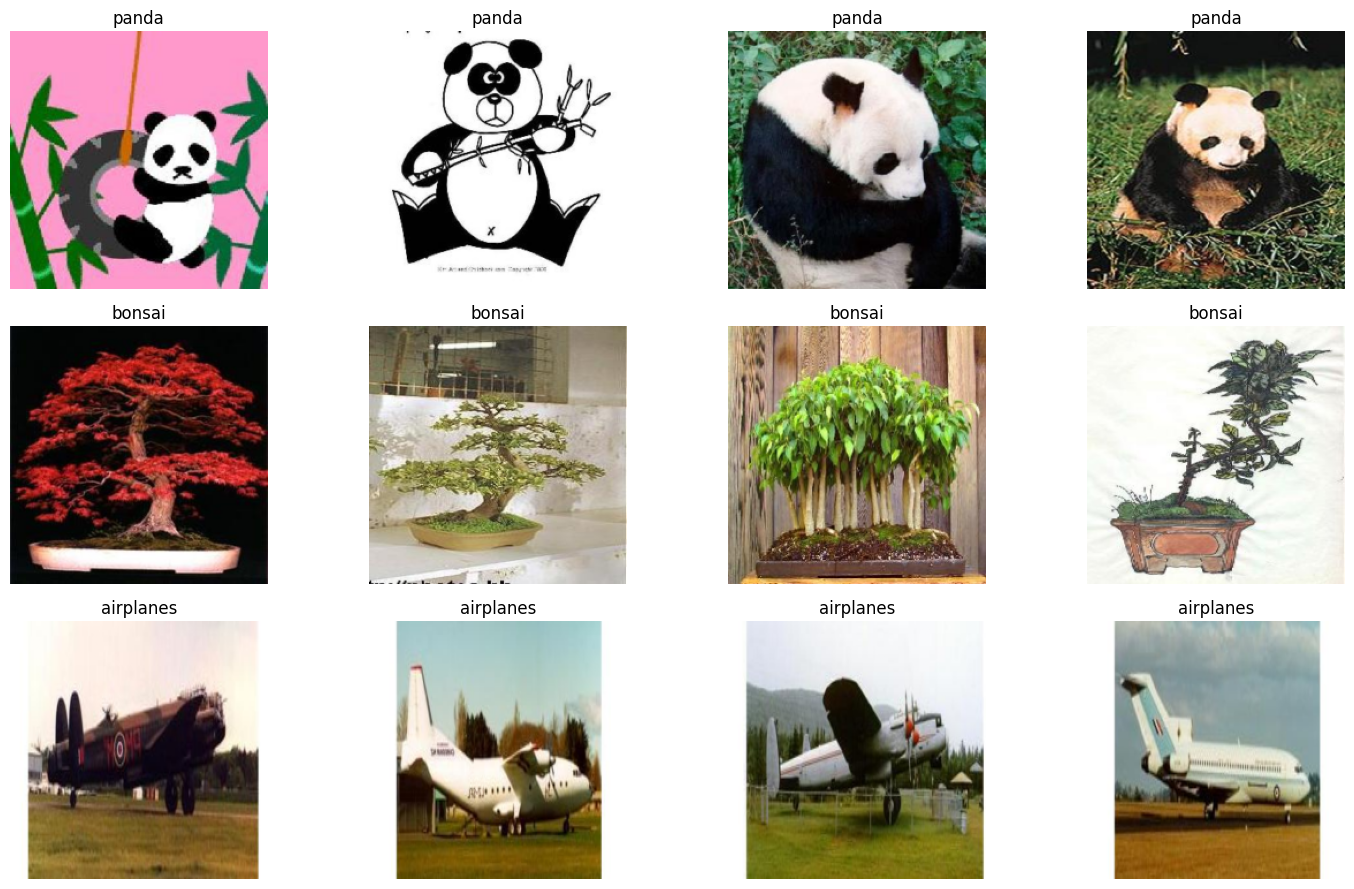

In [4]:
# Load dataset from zip file
zip_path = "Content/CE5012_Assignment_Dataset.zip"  # Specify the path to your zip file

images, targets, targets_name = load_dataset_from_zip(zip_path, transform)
display_few_samples(images, targets_name)

In [5]:
# Define class names
class_names = ['airplanes', 'bonsai', 'panda']

## Your Part-2 Work Starts From Here

1. Define data loader
2. Load model
3. Extract the features
4. Convert them to numpy format
5. Reduce dimensionality of features using t-SNE
6. Plot t-SNE visualization as a 2D plot
**Note**: use label feature in plt.scatter to display class names as legends


In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [7]:
# Imports
import torchvision
from transformers import CLIPProcessor, CLIPModel
from torchvision.models import resnet50, ResNet50_Weights,vit_b_16,vit_b_16
from sklearn.manifold import TSNE

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Initial Setup

In [8]:
# Imported clip to use the OpenAI api
import clip
# Set device to cuda if available.
device = "cuda" if torch.cuda.is_available() else "cpu"
# Reload the data set from disk. Note that the data is unzipped.
# Setting the batch size to the size of the data set.
batch_size = 72
# Load the data and transform to standard size and to Tensor.
image_dataset = torchvision.datasets.ImageFolder(root='Content/CE5012_Assignment_Dataset/101_ObjectCategories_mini/',transform=transform)
data_loader = torch.utils.data.DataLoader(image_dataset,
                                          batch_size=batch_size,shuffle=False)


In [9]:
# Define function to plot features
def plot_featureSpace(X,labels,Title):
     fig, ax = plt.subplots()

     scatter = ax.scatter(X[:, 0], X[:, 1], c=labels,label=class_names,
                      cmap='Set1',alpha=0.5)

# produce a legend with the unique colors from the scatter
     legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
     ax.add_artist(legend1)


plt.show()


# Using CLIP API

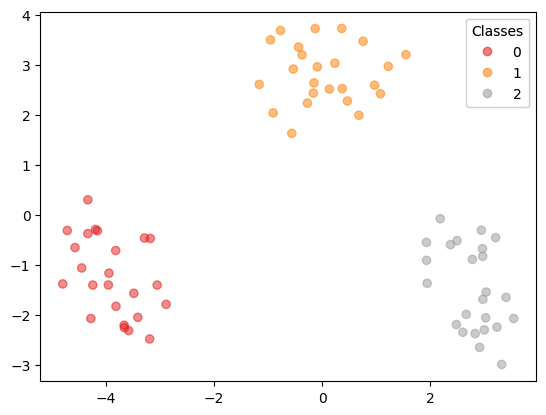

In [10]:
# Tokenize the class names.Not actually needed to generate the cluster for image features.
#text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in class_names]).to(device)

# Create the clip model
model, preprocess = clip.load('ViT-B/32', device)
for i, data in enumerate(data_loader, 0):
        # basic training loop
        inputs, labels = data
#Encode the image features.
        image_features = model.encode_image(inputs.to(device))
# 
        #text_features = model.encode_text(text_inputs.to(device))

labels = labels.to("cpu").numpy()
# Convert image feature tensor to numpy.
feature_space=image_features.detach().to("cpu").numpy()

# Setup the TSNE model
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

# Fit the feature space to TSNE
feature_tsne = tsne.fit_transform(feature_space)
# Plot feature space.
plot_featureSpace(feature_tsne,labels,"Feature Clusters",)

# Using DINO model

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


torch.Size([72, 384])


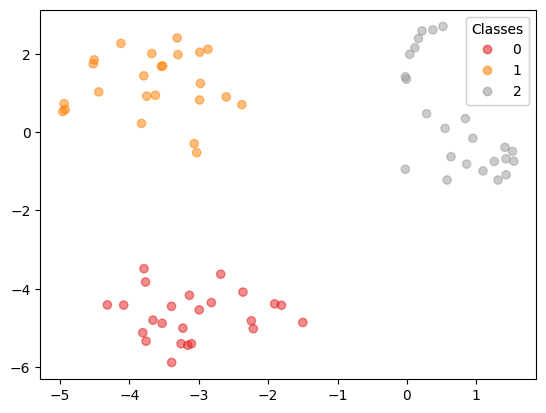

In [11]:
# Load DINO visual transformer load
vits16 = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
for i, data in enumerate(data_loader, 0):
        # basic training loop
        inputs, labels = data
# create model instance with data.
        model = vits16(inputs)
        print(model.shape)

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

feature_space= model.detach().to("cpu").numpy()

feature_tsne = tsne.fit_transform(feature_space)
# Plot the Latent Space
plot_featureSpace(feature_tsne,labels,"Feature Space",)





# Using New Data

## Functions to classify images based on CLIP and to plot images and class.

In [12]:
# Function to display test images with label and probability.
def display_test_samples(images, labels,probArray,indexArray):
    unique_labels = set(labels.numpy())

    # Create subplots
    fig, axes = plt.subplots(len(unique_labels)+1, 4, figsize=(15, 3*len(unique_labels)))
    numRows = int(len(images)/4)
    
    # Display images for each class
    i = 0
    j = 0
    k = 0
    while i < 4:
        j = 0
        while j < 4:
        # Find indices of images belonging to the current class
            image = images[k].permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
            axes[i, j].imshow(image)
            axes[i, j].set_title(class_names[indexArray[k]] + " - " + probArray[k])
            axes[i, j].axis('off')
            j = j+1 
            k = k + 1
        i = i + 1


    plt.tight_layout()
    plt.show()
    return

# Function to classify images processing image by image
def CLIP_Classify(images, labels):
    unique_labels = set(labels)

    # Create subplots
    feature_space = torch.empty(0,512).to(device)
# List of image labels
    image_labels = []
    probArray = []
    indexArray = []

    # Loop through each image
    for i in range(len(images)):
        image_input = images[i].to(device)
        image_input = image_input.reshape(1,3,224,224)
        image = images[i].permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
# Tokenize the class names.
        text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in class_names]).to(device)
        with torch.no_grad():
# Encode the image
            image_features = model.encode_image(image_input)
# Encode the text
            text_features = model.encode_text(text_inputs)
# Get the cosine simliarity.
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
# Get the top 1 match
            values, indices = similarity[0].topk(3)
# capture class and probability of that class
            probValue = str(int(values[0].to("cpu").numpy()*100)) + "%"
            classIndex = indices[0].to("cpu").numpy()
            probArray.append(probValue)
            indexArray.append(classIndex)

            image_labels.append(labels[i])

    return image_labels,probArray,indexArray

## Load and Display new images

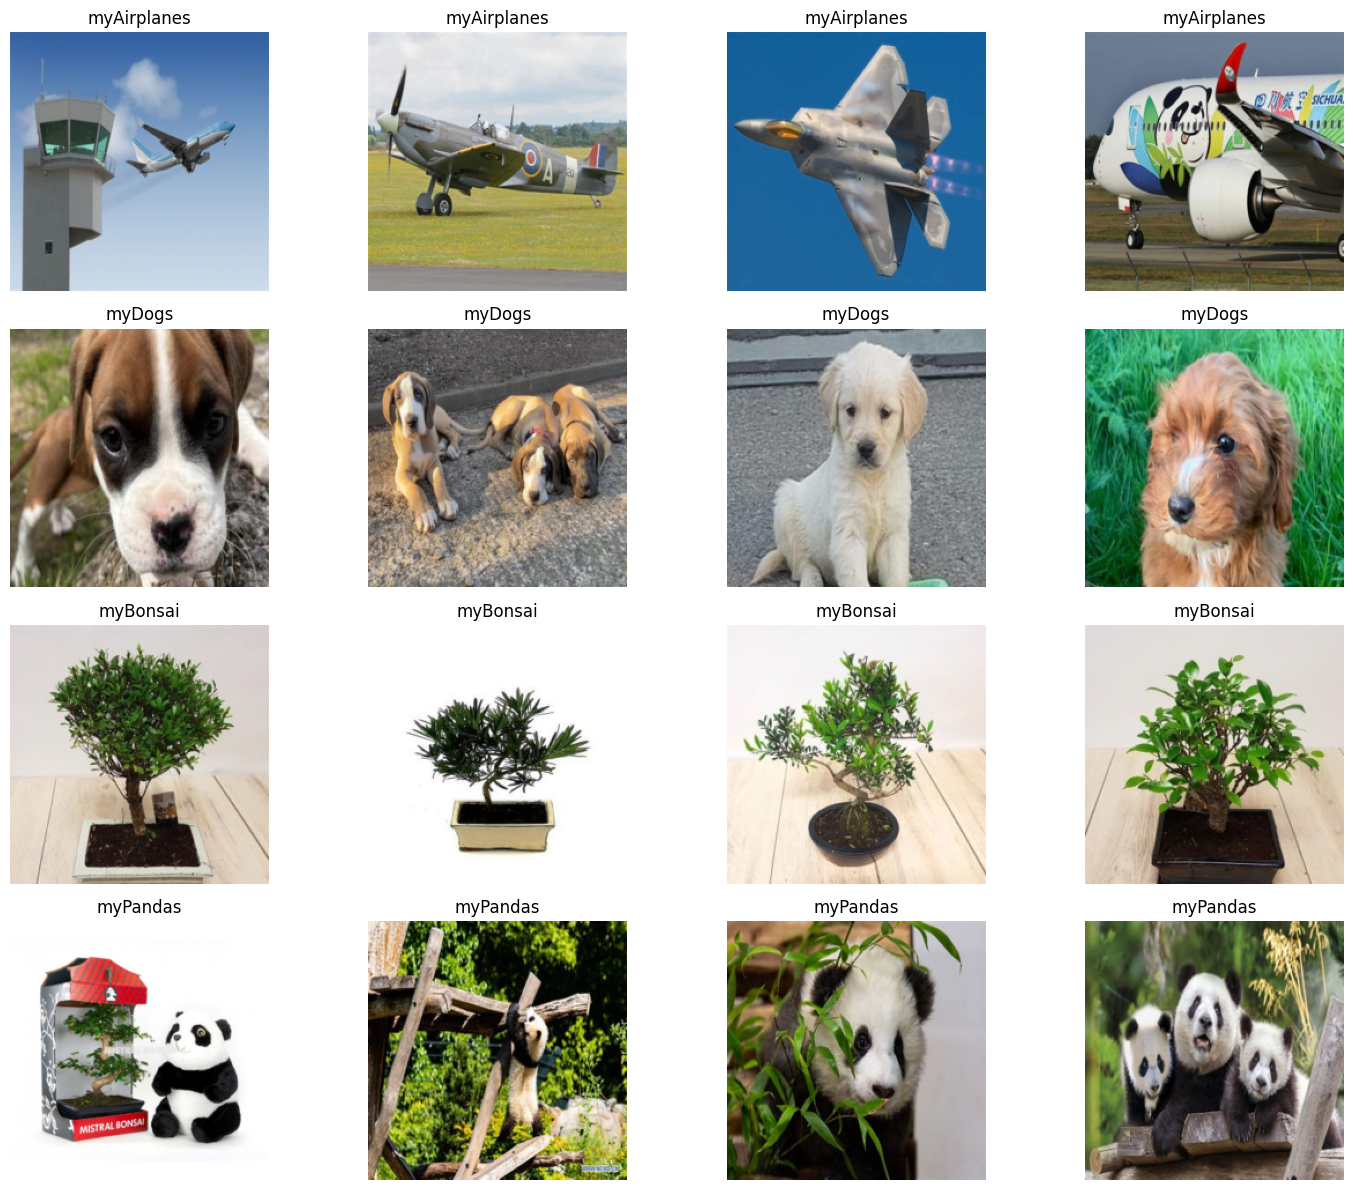

In [13]:
# Load dataset from zip file
# The data set includes images from the internet covering ['airplanes',bonsai','pandas','dogs']

zip_path = "myContent/CE5012_Assignment_Dataset.zip"  # Specify the path to your zip file

images, targets, targets_name = load_dataset_from_zip(zip_path, transform)
display_few_samples(images, targets_name)

# Classify images and plot

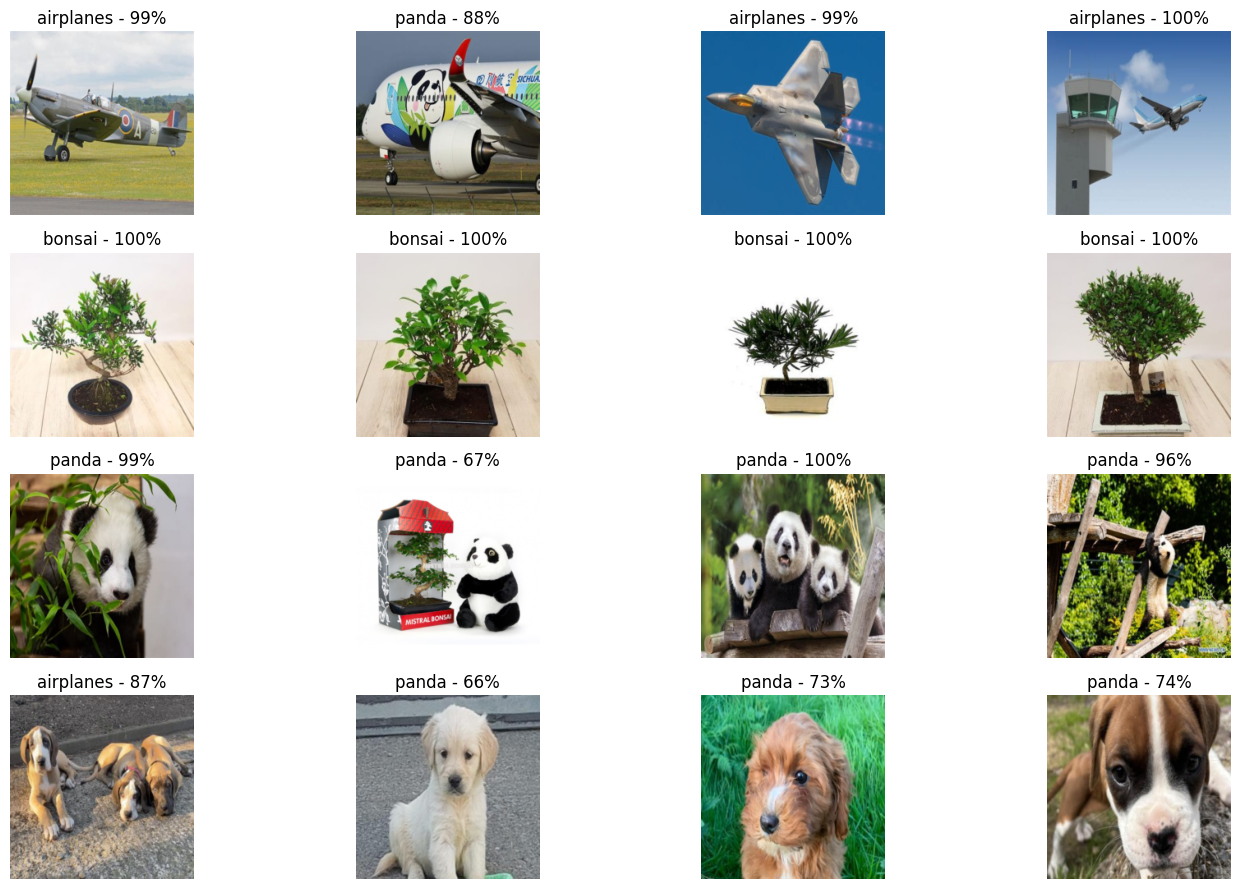

In [14]:
# Using original class names
class_names = ['airplanes', 'bonsai', 'panda']
model, preprocess = clip.load('ViT-B/32', device)
# Classify images
image_labels,probArray,indexArray = CLIP_Classify(images, targets)
# Display images and class and probability
display_test_samples(images,labels,probArray,indexArray)


     


## Observation on Classification based on original Classes

1. The image of an airplane with a panda logo was misclassified as a panda.It may be that Likewise for the panda and the bonsai.
2. All of the images of dogs were classified as either airplane or panda. However the probability of that class was lower than for the correct images.

I think the interesting failure condition with these images is the one where the airplane has a panda logo on the side. The percentage confidence that it is a panda is at 88% so clearly less than the confidence level for actual panda images. A separate test showed that the next most probably class was airplane at 11% , so at least the airplane class was in the top 2.



## Class "dogs" added to class names

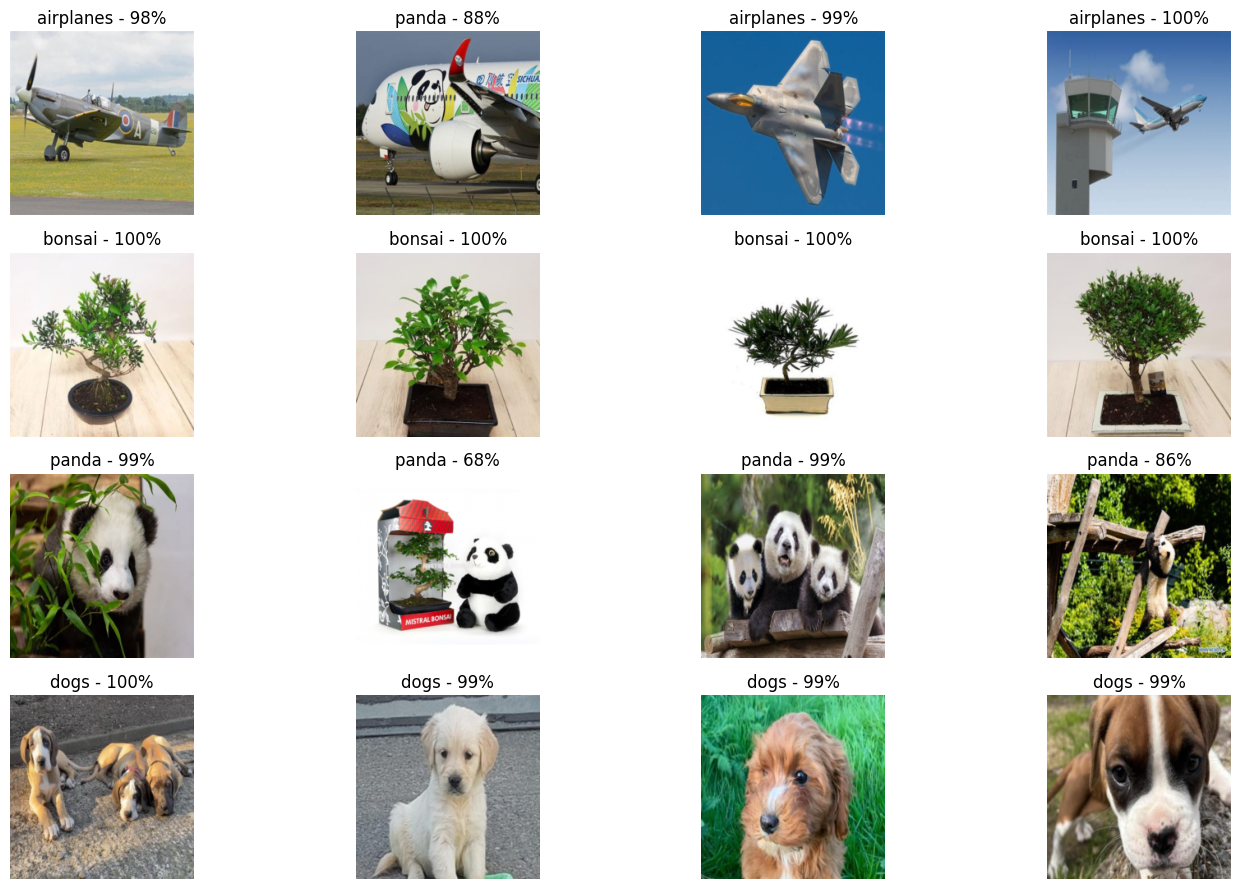

In [15]:
class_names = ['airplanes', 'bonsai', 'panda','dogs']
model, preprocess = clip.load('ViT-B/32', device)
image_labels,probArray,indexArray = CLIP_Classify(images, targets)
display_test_samples(images,labels,probArray,indexArray)

## Observation with dogs class added

As expected with the class added the classification for dogs is not correct as the feature space for the dog images is likely to be well separated from the other images. However it would be interesting to see how this would work in terms of classifying for example  where there is a big overlap in feature space, for example in distinguishing between different dog breeds. 

# Reflection

This assignment was great for understanding and investigating pre-trained models. The strengths and limitations of the models is also useful in terms of determining the best approach in a given scenario. Like with previous assignments, I found the pytorch libraries a serious learnning curve with a lot left to investigate.

# Backup Code Alternative CLIP api using CLIPProcessor and ClIPModel

In [ ]:
# Trying out the hugging face API.
# Create model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
for i, data in enumerate(data_loader, 0):
        inputs, labels = data
# Processer encodes the text and prepares the images
        inputs = processor(text=class_names,images=inputs, return_tensors="pt",do_rescale=False)
        print(inputs.keys())
        pixel_values = inputs["pixel_values"]
        with torch.inference_mode():
            outputs = model.vision_model(pixel_values)
            image_embeds = outputs.last_hidden_state.to(device)
            print(image_embeds.shape)
        image_embeds = image_embeds.reshape(batch_size,768*50)


tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

feature_space= image_embeds.detach().to("cpu").numpy()

feature_tsne = tsne.fit_transform(feature_space)
# Plot the Latent Space
plot_featureSpace(feature_tsne,labels,"Feature Space",)


In [29]:
# checking available models in torchvision
import torchvision
all_models = torchvision.models.list_models() 
print(all_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'deeplabv3_mobilenet_v3_large', 'deeplabv3_resnet101', 'deeplabv3_resnet50', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'fasterrcnn_mobilenet_v3_large_320_fpn', 'fasterrcnn_mobilenet_v3_large_fpn', 'fasterrcnn_resnet50_fpn', 'fasterrcnn_resnet50_fpn_v2', 'fcn_resnet101', 'fcn_resnet50', 'fcos_resnet50_fpn', 'googlenet', 'inception_v3', 'keypointrcnn_resnet50_fpn', 'lraspp_mobilenet_v3_large', 'maskrcnn_resnet50_fpn', 'maskrcnn_resnet50_fpn_v2', 'maxvit_t', 'mc3_18', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'mvit_v1_b', 'mvit_v2_s', 'quantized_googlenet', 'quantized_inception_v3', 'quantized_mobilenet_v2